###Task 1: Download the dataset from drive link given below and split them into Training and Validation Sets

#Importing Libraries 

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image
%matplotlib inline

##Extracting the Files from the Folder

In [ ]:
!unzip /content/drive/MyDrive/charts.zip -d /content/

Archive:  /content/drive/MyDrive/charts.zip
   creating: /content/charts/
   creating: /content/charts/test/
  inflating: /content/charts/test/0.png  
  inflating: /content/charts/test/1.png  
  inflating: /content/charts/test/10.png  
  inflating: /content/charts/test/11.png  
 extracting: /content/charts/test/12.png  
 extracting: /content/charts/test/13.png  
  inflating: /content/charts/test/14.png  
  inflating: /content/charts/test/15.png  
  inflating: /content/charts/test/16.png  
  inflating: /content/charts/test/17.png  
  inflating: /content/charts/test/18.png  
  inflating: /content/charts/test/19.png  
  inflating: /content/charts/test/2.png  
  inflating: /content/charts/test/20.png  
  inflating: /content/charts/test/21.png  
  inflating: /content/charts/test/22.png  
  inflating: /content/charts/test/23.png  
  inflating: /content/charts/test/24.png  
  inflating: /content/charts/test/25.png  
  inflating: /content/charts/test/26.png  
  inflating: /content/charts/test/

In [ ]:
#Reading the training values and storing it in dataframe

train=pd.read_csv('/content/charts/train_val.csv')
train.head()    # printing first five rows of the file


,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [ ]:
#Reading the testing values and storing it in dataframe

test=pd.read_csv('/content/charts/test.csv')
test.head()    # printing first five rows of the file

,image_index,type
0,0,vbar_categorical
1,1,hbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,line


In [ ]:
#Appending / and png to match the image format
train['image_index']='/'+train['image_index'].astype(str)+'.png'
train.head()

,image_index,type
0,/0.png,vbar_categorical
1,/1.png,vbar_categorical
2,/2.png,vbar_categorical
3,/3.png,vbar_categorical
4,/4.png,vbar_categorical


In [ ]:
#Appending string and png to match the image format

test['image_index']='/'+test['image_index'].astype(str)+'.png'
test.head()

,image_index,type
0,/0.png,vbar_categorical
1,/1.png,hbar_categorical
2,/2.png,vbar_categorical
3,/3.png,vbar_categorical
4,/4.png,line


In [ ]:
#Concatenating the path of image 

train['image_index']='/content/charts/train_val'+train['image_index']
train.head()

,image_index,type
0,/content/charts/train_val/0.png,vbar_categorical
1,/content/charts/train_val/1.png,vbar_categorical
2,/content/charts/train_val/2.png,vbar_categorical
3,/content/charts/train_val/3.png,vbar_categorical
4,/content/charts/train_val/4.png,vbar_categorical


In [ ]:
#Concatenating the path of image 


test['image_index']='/content/charts/train_val'+test['image_index']
test.head()

,image_index,type
0,/content/charts/train_val/0.png,vbar_categorical
1,/content/charts/train_val/1.png,hbar_categorical
2,/content/charts/train_val/2.png,vbar_categorical
3,/content/charts/train_val/3.png,vbar_categorical
4,/content/charts/train_val/4.png,line


In [ ]:
# sort label
labels = train.sort_values('type')
labels.head()

,image_index,type
999,/content/charts/train_val/999.png,dot_line
871,/content/charts/train_val/871.png,dot_line
870,/content/charts/train_val/870.png,dot_line
869,/content/charts/train_val/869.png,dot_line
868,/content/charts/train_val/868.png,dot_line


In [ ]:
# take unique labels
class_names = list(labels.type.unique())
class_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
# take unique labels
class_test_names = list(test['type'].unique())
class_test_names

['vbar_categorical', 'hbar_categorical', 'line', 'dot_line', 'pie']

In [ ]:
#creating a new root directory for training set

import shutil, os
newpath = r'./train_labels' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
#creating subfolders for training set
for c in class_names:
    dest =  r'./train_labels/'+str(c)
    os.makedirs(dest)
    for i in list(labels[labels['type']==c]['image_index']): # Image Id
        get_image = os.path.join('/content/charts/train_val', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)  

In [ ]:
#creating a new root directory for test set

import shutil, os
newpath = r'./test_labels' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
#creating subfolders for testing set
for c in class_test_names:
    dest =  r'./test_labels/'+str(c)
    os.makedirs(dest)
    for i in list(test[test['type']==c]['image_index']): # Image Id
        get_image = os.path.join('/content/charts/test', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)  

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
#Defining parameters 

BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

In [ ]:
#creates a dataset of labeled trained images by reading images from a directory on disk.
#shuffling and resizing of the images, and batching of the data for training

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train_labels",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1000 files belonging to 5 classes.


In [ ]:
#creates a dataset of labeled test images by reading images from a directory on disk.
##shuffling and resizing of the images, and batching of the data for test set


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "test_labels",
    seed=123,
    shuffle=False,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 50 files belonging to 5 classes.


In [ ]:
#Printing the class names of train set
class_train_names = train_dataset.class_names
class_train_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
#Printing the class names of test set
class_test_names = test_dataset.class_names
class_test_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 128, 128, 3)
[2 3 2 1 0 1 4 4 4 1 1 3 3 2 4 4 1 1 1 1 3 1 4 1 3 0 2 4 3 3 2 4]


# Visualizing Some Images

 Visualizing the First batch of Images

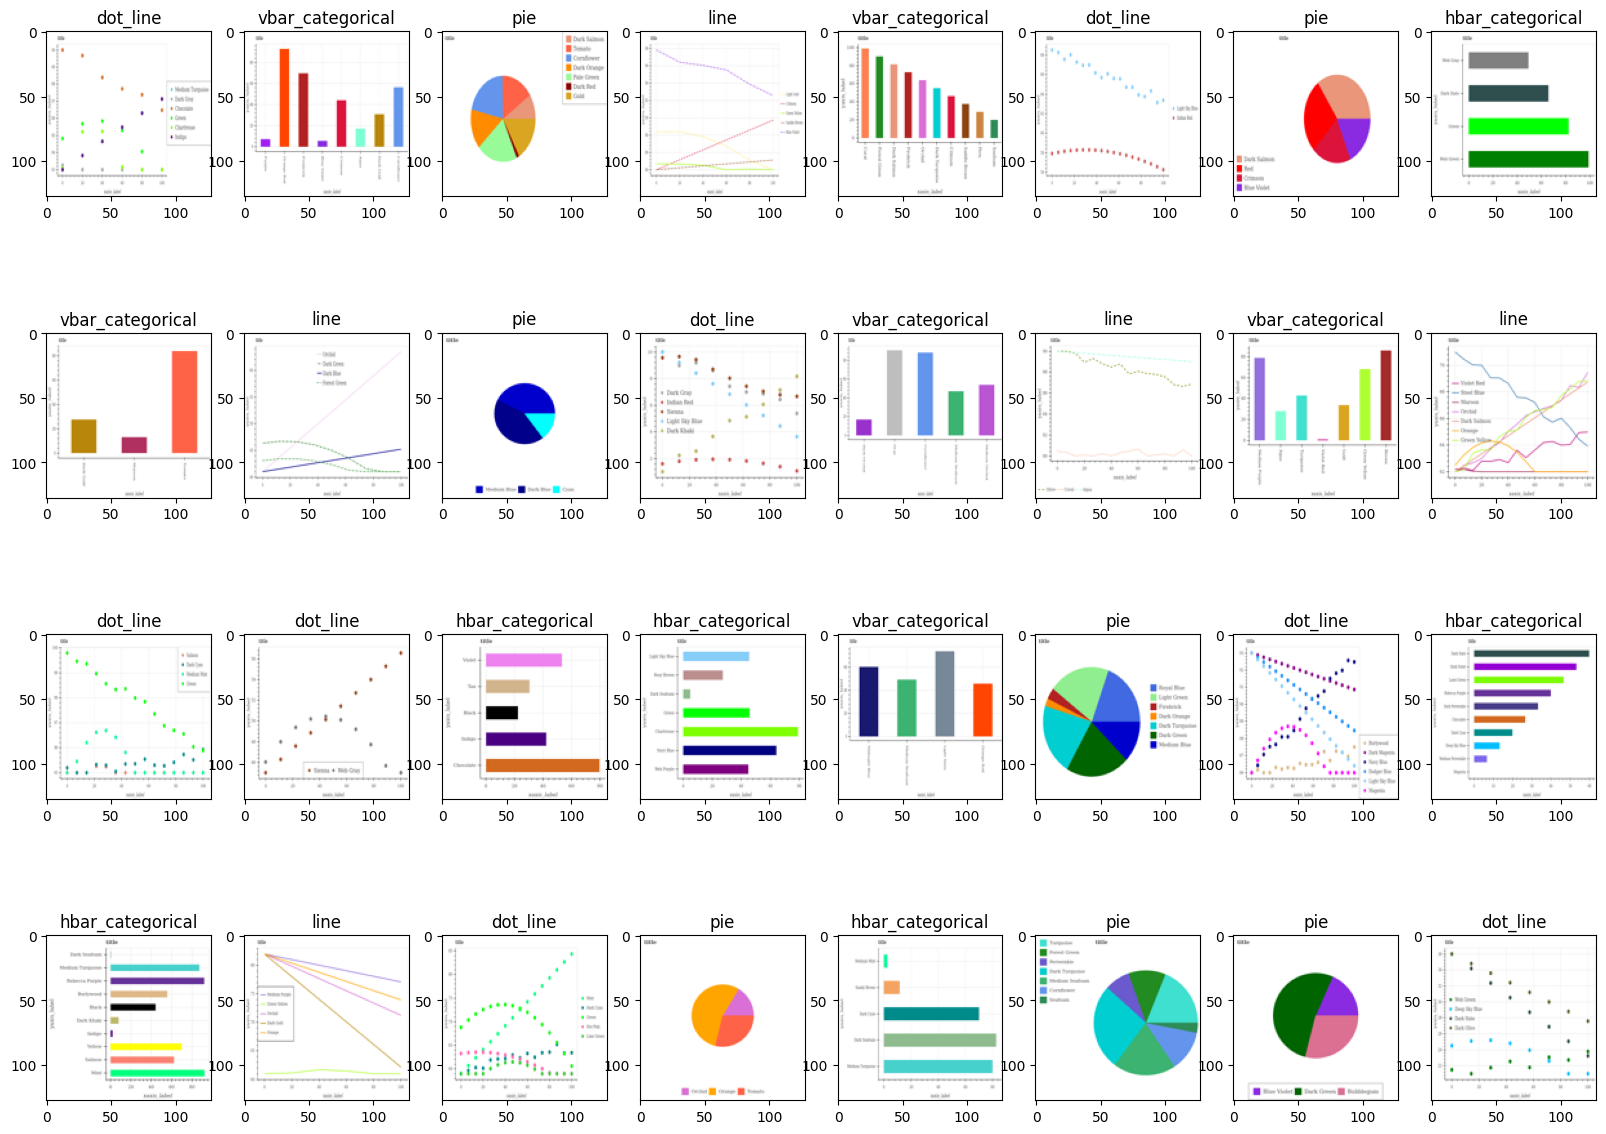

In [ ]:
plt.figure(figsize=(20,15))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        



*   Here first batch of images are displayed along with their actual labels



#Task 1:Upload the Dataset 


*   Split train and val images for training and validation in an appropriate ratio (e.g., 80% for
training and 20 % for validating).





##Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training

1.   Training: Dataset to be used while training
2.   Validation: Dataset to be tested against while training


In [ ]:
len(train_dataset)

32

In [ ]:
train_size = 0.8
len(train_dataset)*train_size

25.6

In [ ]:
train_ds = train_dataset.take(26)
len(train_ds)

26

In [ ]:
remaining_ds = train_dataset.skip(26)
len(remaining_ds)


6

In [ ]:
val_size=0.2
len(train_dataset)*val_size

6.4

In [ ]:
val_ds = remaining_ds.take(6)
len(val_ds)


6

Inference:



*   Batch size: 32

*   Training set:   25 (80% )

*   Validation Set: 6  (20%)



In [ ]:
 #Function to split  into a training(80%)and validation set (20%)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(round((train_split * ds_size)))
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    
    
    return train_ds, val_ds

In [ ]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [ ]:
len(train_ds)

26

In [ ]:
len(val_ds)

6

#Data Augmentation

Data augmentation is a technique to increase the diversity of data by applying random transformations, such as flipping, rotating, or shifting, to the original dataset.

In [ ]:
#The resize_and_rescale object is a sequential model that resizes images to IMAGE_SIZE and scales their pixel values to a range of [0,1].

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
# data augmentation pipeline using Keras Sequential API that includes random horizontal and vertical flipping and random rotation of the input images with a maximum angle of 0.2 radians.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  
])

In [ ]:
#Applying data augmentation for test

data_augmentation_test = tf.keras.Sequential([
 
  
])

In [ ]:
#mapping training set to data augmentation

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)



In [ ]:
##mapping testing set to data augmentation

test_ds = train_dataset.map(
    lambda x, y: (data_augmentation_test(x), y)
)


#TASK 2 : Implement a two-layer Convolutional Neural Network:

###Model Architecture

In [ ]:
#Building the model with two convolutional layers

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5 #No of classes

model = models.Sequential([
    
    resize_and_rescale,

    # First convolutional layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output from the convolutional layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 128, 128, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 126, 126, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 63, 63, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 61, 61, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 30, 30, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (32, 57600)              

#Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Fitting the model

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

26/26 [==============================] - 14s 88ms/step - loss: 2.1962 - accuracy: 0.2129 - val_loss: 1.2698 - val_accuracy: 0.3854
Epoch 2/50
26/26 [==============================] - 3s 82ms/step - loss: 1.0896 - accuracy: 0.5198 - val_loss: 0.8019 - val_accuracy: 0.6198
Epoch 3/50
26/26 [==============================] - 4s 109ms/step - loss: 0.6992 - accuracy: 0.6430 - val_loss: 0.5253 - val_accuracy: 0.8229
Epoch 4/50
26/26 [==============================] - 3s 89ms/step - loss: 0.6207 - accuracy: 0.7188 - val_loss: 0.5251 - val_accuracy: 0.7135
Epoch 5/50
26/26 [==============================] - 3s 83ms/step - loss: 0.5348 - accuracy: 0.7611 - val_loss: 0.3786 - val_accuracy: 0.7969
Epoch 6/50
26/26 [==============================] - 4s 125ms/step - loss: 0.5240 - accuracy: 0.7611 - val_loss: 0.4614 - val_accuracy: 0.8385
Epoch 7/50
26/26 [==============================] - 3s 89ms/step - loss: 0.4482 - accuracy: 0.8197 - val_loss: 0.4450 - val_accuracy: 0.7917
Epoch 8/50
26/26 [===

*   The model built using CNN performs well.
*   The overall accuracy of model is :

<center>
<b>
Accuracy= 0.9814 i.e 98.14%</b>
</center>



*   The Validation accuracy of model is :
<center>
<b>
Accuracy= 0.9792 i.e 97.12%</b>
</center>




In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.1961772441864014,
 1.0895811319351196,
 0.6991665363311768,
 0.6206997632980347,
 0.534847617149353]

# Task 2.1 Calculate Accuracy and loss and plot the obtained  accuracy and loss.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

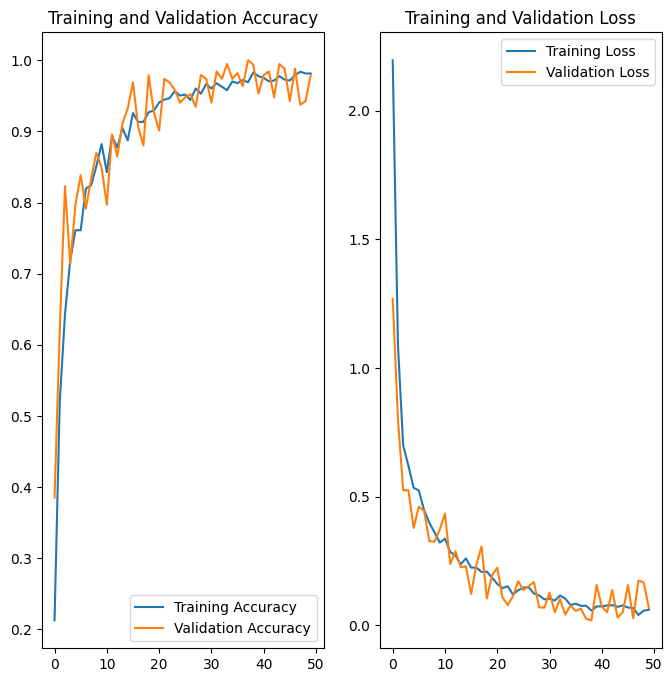

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Inference:



*   
*   Both Training and Testing Loss reduces gradually
*    The Accuracies for both training and validation sets increases 



In [ ]:
import os

for file in os.listdir('/content/charts/test'):
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.bmp') or file.endswith('.gif'):
        print(file)

In [ ]:
#This function takes a trained model and an image, converts the image into a numpy array, makes a prediction using the model, returns the predicted class name and its confidence level as a percentage.

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_test_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


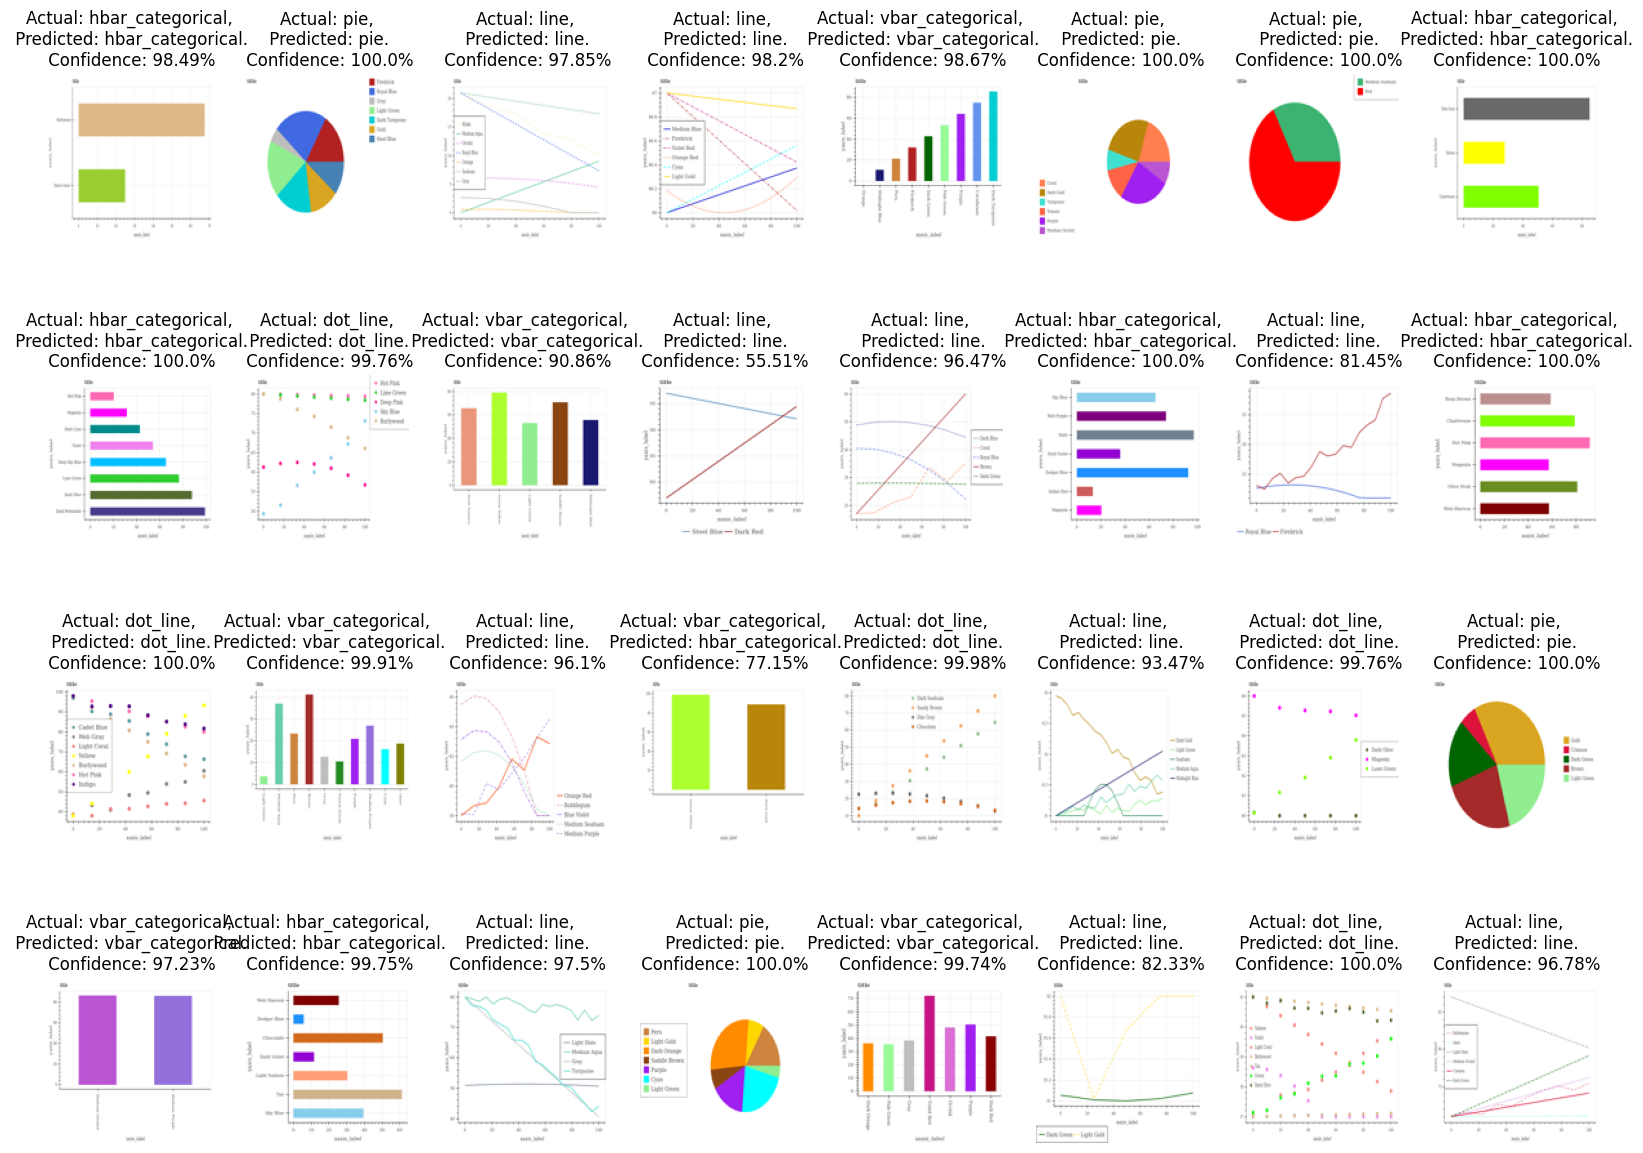

In [ ]:
#plots a grid of images from the test dataset, along with their actual and predicted classes and prediction confidence, using a given model.

plt.figure(figsize=(20, 20))
for images, labels in test_ds:
    batch_size = images.shape[0] # get batch size
    for i in range(batch_size):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_test_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")






#Inference:



*   The actual and predicted Values are matching for  test images


*   Proving our model working great !!.




